## DATA 240: Assignment No: 3

### 1. Linear regression with gradient decent 

Please download housing.csv. This is a real-life dataset consisting of housing sales prices in the city of Windsor,
Ontario, Canada. You can find a description of the variables in housing.txt. Our target variable is ‘price’

Importing only the allowed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing_df = pd.read_csv('housing.csv')

In [3]:
housing_df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
housing_df.shape

(546, 12)

Description of columns: 

sell = sale price of a house \
lot = the lot size of a property in square feet \
bdms = the number of bedrooms \
fb = the number of full bathrooms \
sty = the number of stories excluding basement \
drv = 1 if the house has a driveway \
rec = 1 if the house has a recreational room \
ffin = 1 if the house has a full finished basement \
ghw = 1 if the house uses gas for hot water heating \
ca = 1 if there is central air conditioning \
gar = the number of garage places \
reg = 1 if the house is located in the preferred neighbourhood of the city

In [5]:
housing_df.isna().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

There are no missing values in housing.csv

In [6]:
housing_df.dtypes

price        int64
lotsize      int64
bedrooms     int64
bathrms      int64
stories      int64
driveway    object
recroom     object
fullbase    object
gashw       object
airco       object
garagepl     int64
prefarea    object
dtype: object

Checking the unique values, the categorical columns possesses.

In [7]:
housing_df['bedrooms'].unique()

array([3, 2, 4, 1, 5, 6])

In [8]:
housing_df['bathrms'].unique()


array([1, 2, 3, 4])

In [9]:
housing_df['stories'].unique()

array([2, 1, 3, 4])

In [10]:
housing_df['driveway'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
housing_df['garagepl'].unique()

array([1, 0, 2, 3])

Mapping categorical columns having object datatype to binary values

In [12]:
categorical_columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
for col in categorical_columns:
    housing_df[col] = housing_df[col].map({'yes': 1, 'no': 0})

In [13]:
housing_df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [14]:
housing_df.dtypes

price       int64
lotsize     int64
bedrooms    int64
bathrms     int64
stories     int64
driveway    int64
recroom     int64
fullbase    int64
gashw       int64
airco       int64
garagepl    int64
prefarea    int64
dtype: object

housing.csv now has all numerical values and int datatype

Linear regression using gradient descent method from scratch. Before starting to implement gradient descent, we shall normalise all the variables excluding price (which is our target variable) using Z-score Normalisation.

In [15]:
X = housing_df.drop(columns=['price'])
y = housing_df['price']

Z-Score Normalisation

In [16]:
X_norm = (X - X.mean()) / X.std()

In [17]:
X_norm

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.322732,0.047192,-0.568973,0.221501,0.404819,-0.464371,1.362070,-0.218853,-0.680410,0.357239,-0.552865
1,-0.530526,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
2,-0.964074,0.047192,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
3,0.691709,0.047192,-0.568973,0.221501,0.404819,2.149509,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
4,0.557955,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
...,...,...,...,...,...,...,...,...,...,...,...
541,-0.161550,0.047192,1.422433,2.525111,0.404819,2.149509,-0.732832,-0.218853,1.467011,-0.803788,-0.552865
542,0.391915,0.047192,1.422433,2.525111,0.404819,-0.464371,-0.732832,-0.218853,1.467011,-0.803788,-0.552865
543,0.391915,0.047192,1.422433,2.525111,0.404819,2.149509,-0.732832,-0.218853,1.467011,0.357239,-0.552865
544,0.391915,0.047192,1.422433,0.221501,0.404819,2.149509,-0.732832,-0.218853,1.467011,0.357239,-0.552865


Adding a column of ones to X to account for the bias (intercept) term

In [18]:
X_norm.insert(0,'bias',1)

Converting X and y to numpy arrays

In [19]:
X_norm_1 = X_norm.values

In [20]:
display(X_norm_1)

array([[ 1.        ,  0.32273211,  0.04719162, ..., -0.68040981,
         0.35723902, -0.55286459],
       [ 1.        , -0.53052646, -1.30894664, ..., -0.68040981,
        -0.80378779, -0.55286459],
       [ 1.        , -0.96407405,  0.04719162, ..., -0.68040981,
        -0.80378779, -0.55286459],
       ...,
       [ 1.        ,  0.39191523,  0.04719162, ...,  1.46701074,
         0.35723902, -0.55286459],
       [ 1.        ,  0.39191523,  0.04719162, ...,  1.46701074,
         0.35723902, -0.55286459],
       [ 1.        ,  0.39191523,  0.04719162, ...,  1.46701074,
         0.35723902, -0.55286459]])

In [21]:
y = y.values

1-1. Please build a gradient descent algorithm based on the following formulas

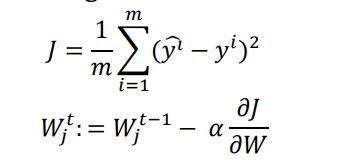

In [22]:
# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    y_pred = np.dot(X, weights)
    cost = (1 / m) * np.sum((y_pred - y) ** 2)
    return cost

# RMSE calculation
def compute_rmse(y_pred, y):
    rmse = np.sqrt(np.mean((y_pred - y) ** 2))
    return rmse

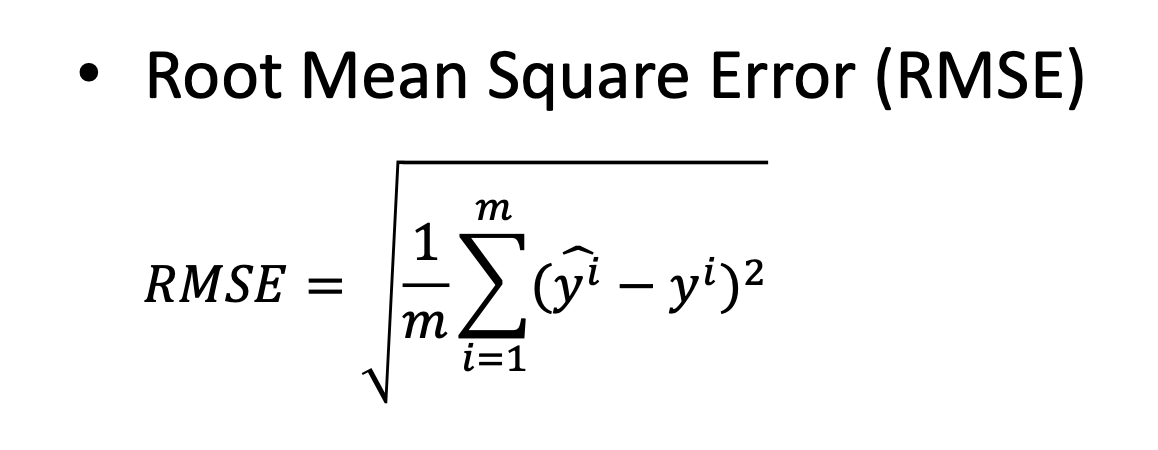

Initialize weights and set hyperparameters

Initializing weights to be a random number between 0 and 1, and then multiplying by 0.01 to scale the values down to be small and near-zero but not zero. This is useful for optimization algorithms like gradient descent.

In [23]:
X_norm_1.shape[1]

12

In [24]:
W = np.random.rand(X_norm_1.shape[1]) * 0.01
learning_rate = 0.25
epochs = 20
m = len(y)

Implementing Gradient Descent on the given data

In [25]:
for epoch in range(epochs):
    #compute predictions with initial weights
    Y_pred = np.dot(X_norm_1, W)  

    #compute error
    errors = Y_pred - y

    #calculate gradients
    gradients = (2/m) * np.dot(X_norm_1.T, errors)

    #Update weights
    W -= learning_rate * gradients 
    
    #compute and print cost and RMSE for the current epoch
    cost = compute_cost(X_norm_1, y, W)
    rmse = compute_rmse(Y_pred, y)
    print(f"Epoch {epoch + 1}, Cost: {cost:.4f}, RMSE: {rmse:.4f}")

Optimal_weights = W

Epoch 1, Cost: 1416389470.1056, RMSE: 73159.2635
Epoch 2, Cost: 527869274.6163, RMSE: 37634.9501
Epoch 3, Cost: 307529033.1818, RMSE: 22975.4059
Epoch 4, Cost: 251985003.7993, RMSE: 17536.5057
Epoch 5, Cost: 237820582.1747, RMSE: 15874.0355
Epoch 6, Cost: 234130599.0492, RMSE: 15421.4326
Epoch 7, Cost: 233126982.2370, RMSE: 15301.3267
Epoch 8, Cost: 232830744.0320, RMSE: 15268.4964
Epoch 9, Cost: 232730755.4202, RMSE: 15258.7924
Epoch 10, Cost: 232690628.3982, RMSE: 15255.5156
Epoch 11, Cost: 232671620.1068, RMSE: 15254.2004
Epoch 12, Cost: 232661470.0828, RMSE: 15253.5773
Epoch 13, Cost: 232655651.7804, RMSE: 15253.2446
Epoch 14, Cost: 232652186.5549, RMSE: 15253.0539
Epoch 15, Cost: 232650080.1141, RMSE: 15252.9403
Epoch 16, Cost: 232648784.8744, RMSE: 15252.8712
Epoch 17, Cost: 232647982.9099, RMSE: 15252.8287
Epoch 18, Cost: 232647484.1359, RMSE: 15252.8025
Epoch 19, Cost: 232647172.9773, RMSE: 15252.7861
Epoch 20, Cost: 232646978.4398, RMSE: 15252.7759


In [26]:
print("\ngradients:\n", gradients)
print("\n Optimal weights:\n", Optimal_weights)


gradients:
 [ -0.25986326  -8.63641887  13.86169793   0.91037406 -17.35253541
   6.17845468   6.93986664 -13.25266145   0.79801058   5.47481379
   0.11570901   2.75526399]

 Optimal weights:
 [68121.53210378  7681.06233908  1363.41749674  7200.64156874
  5675.76676439  2335.61245552  1732.20388273  2589.95755996
  2685.54878502  5888.46458244  3655.52705543  3975.7551691 ]


Fitting the data using the Linear regression model with the optimum Weight. 

In [27]:
predictions = np.dot(X_norm_1,Optimal_weights)

Plotting ‘price’ vs ‘lotsize’ on the original scale

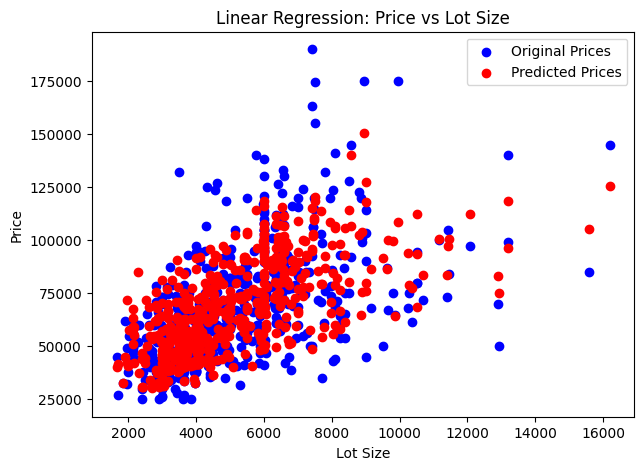

In [28]:
# housing_df['lotsize'] having original values
# y = housing_df['price'] having original values

plt.figure(figsize=(7, 5))
plt.scatter(housing_df['lotsize'], y, color='blue', label="Original Prices")
plt.scatter(housing_df['lotsize'], predictions, color='red', label="Predicted Prices")
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.title("Linear Regression: Price vs Lot Size")
plt.legend()
plt.show()

Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2. The y and 𝑦̂ should be original scale instead of
normalized scale. 

Calculating and displaying R^2

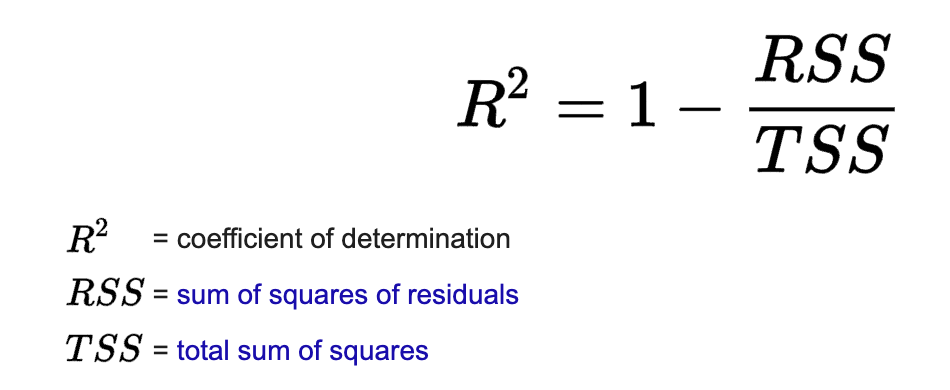

In [29]:
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - predictions) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R^2: {r_squared}")

R^2: 0.6731231610882114


Plotting true-price (y) vs predicted-price (ŷ) on original scale

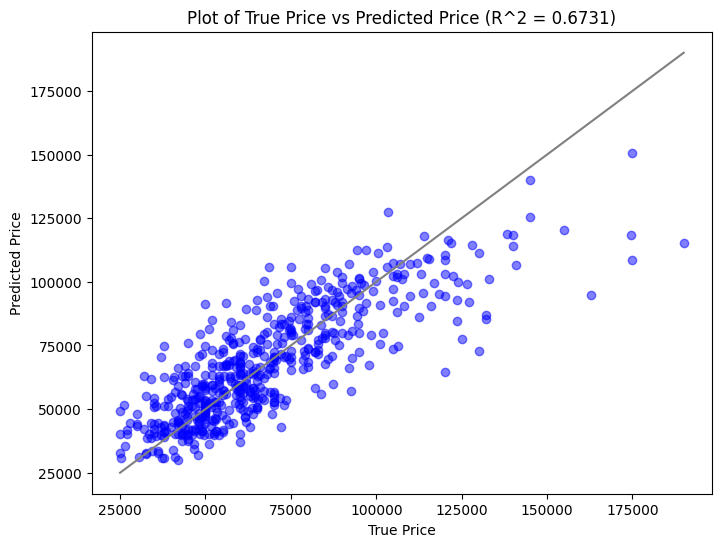

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color='blue', alpha=0.5)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title(f"Plot of True Price vs Predicted Price (R^2 = {r_squared:.4f})")

#Add line of perfect fit
plt.plot([min(y), max(y)], [min(y), max(y)], color='gray')
plt.show()

### 1-2. Please build a gradient descent algorithm based on the following cost function.

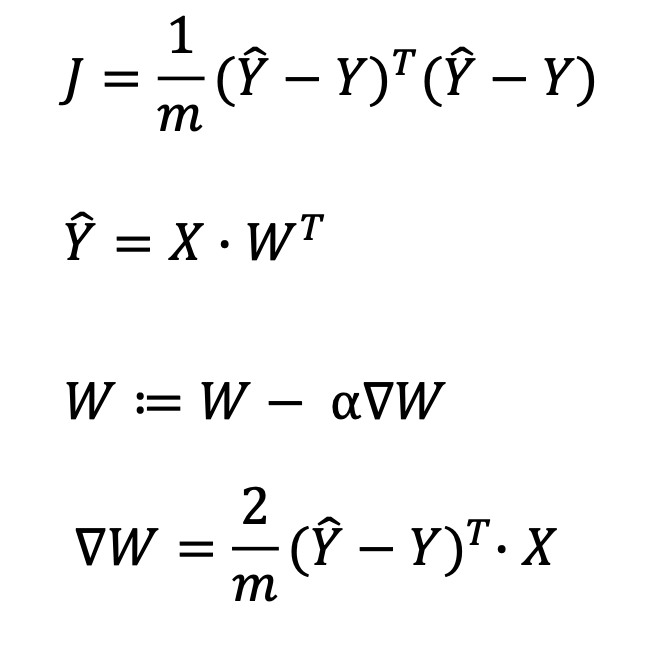

Please print out the Root Mean Squared Error (RMSE) every iteration (until 10 epochs).
Please fit the data using the Linear regression model with the optimum Weight.
Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2.

Setting new variable with X_new and y_new for features and target respectively

In [31]:
X_new = housing_df.drop(columns=['price'])
y_new = housing_df['price']

Z-score normalising variables

In [32]:
X_norm = (X_new - X_new.mean()) / X_new.std()

Adding bias

In [33]:
X_norm.insert(0,'bias',1)

convert X and y to numpy arrays

In [34]:
X_norm_2 = X_norm.values

In [35]:
Y= y_new.values

Initializing weights randomly having value between 0 and 1, and multiplying with 0.01 for getting small values not near zero

In [36]:
weights = np.random.rand(1, X_norm_2.shape[1]) * 0.01

In [37]:
print(weights)

[[0.00192998 0.00269164 0.0019595  0.00063317 0.00170443 0.00144071
  0.00874815 0.0029777  0.00091164 0.00925495 0.00790673 0.00772461]]


In [38]:
weights.shape

(1, 12)

In [39]:
X_norm_2.shape

(546, 12)

In [40]:
Y.shape

(546,)

In [41]:
Y = Y.reshape(-1, 1)

In [42]:
Y.shape

(546, 1)

Setting Learning rate and number of epochs

In [43]:
alpha = 0.25 # learning rate
epochs = 20 # epochs

Gradient Descent Algorithm

In [44]:
costs = []
rmses = []
for epoch in range(epochs):
    # Compute predictions: Ŷ = X · W^T
    Y_pred = X_norm_2.dot(weights.T)

    # Compute cost function J
    J = (1 / len(Y)) * ((Y_pred - Y).T.dot(Y_pred - Y))[0, 0]
    costs.append(J)

    # Compute gradient
    dW = (2 / len(Y)) * (Y_pred - Y).T.dot(X_norm_2)
    dW = dW.reshape(1, -1) # Reshaping to ensure the shape (1, 12), W.T and W shape should be same

    # Update weights
    weights -= alpha * dW

    # Calculate and store cost and RMSE for the epoch
    rmse = np.sqrt(np.mean((Y_pred - Y) ** 2))
    rmses.append(rmse)
    print(f"Epoch {epoch + 1}, Cost: {J:.4f}, RMSE: {rmse:.4f}")

final_weights = weights

Epoch 1, Cost: 5352277570.9777, RMSE: 73159.2617
Epoch 2, Cost: 1416389481.6802, RMSE: 37634.9503
Epoch 3, Cost: 527869279.1807, RMSE: 22975.4060
Epoch 4, Cost: 307529034.1902, RMSE: 17536.5058
Epoch 5, Cost: 251985003.9571, RMSE: 15874.0355
Epoch 6, Cost: 237820582.1510, RMSE: 15421.4326
Epoch 7, Cost: 234130598.9968, RMSE: 15301.3267
Epoch 8, Cost: 233126982.1895, RMSE: 15268.4964
Epoch 9, Cost: 232830743.9952, RMSE: 15258.7924
Epoch 10, Cost: 232730755.3934, RMSE: 15255.5156
Epoch 11, Cost: 232690628.3795, RMSE: 15254.2004
Epoch 12, Cost: 232671620.0940, RMSE: 15253.5773
Epoch 13, Cost: 232661470.0742, RMSE: 15253.2446
Epoch 14, Cost: 232655651.7747, RMSE: 15253.0539
Epoch 15, Cost: 232652186.5512, RMSE: 15252.9403
Epoch 16, Cost: 232650080.1117, RMSE: 15252.8712
Epoch 17, Cost: 232648784.8728, RMSE: 15252.8287
Epoch 18, Cost: 232647982.9089, RMSE: 15252.8025
Epoch 19, Cost: 232647484.1352, RMSE: 15252.7861
Epoch 20, Cost: 232647172.9769, RMSE: 15252.7759


In [45]:
print("Shape of dW:", dW.shape)

Shape of dW: (1, 12)


In [46]:
print(final_weights)

[[68121.53210378  7681.06233857  1363.41749012  7200.64156744
   5675.76677346  2335.61245168  1732.20388317  2589.95756278
   2685.54878394  5888.46457862  3655.52706022  3975.75517034]]


In [47]:
print("Shape of X_b:", X_norm_2.shape)

Shape of X_b: (546, 12)


This should be the shape of all matrix for doing matrix calculation for gradient descent

X_b is (546,12),\
Y is (546,1)\
Y_pred is (546,1),\
Y_pred - Y is (546,546),\
W = (1,12),\
WT = (12,1)\
dW =(1,12)

Calculate final predictions with optimized weights (final weights)

In [48]:
predictions = np.dot(X_norm_2,final_weights.T)

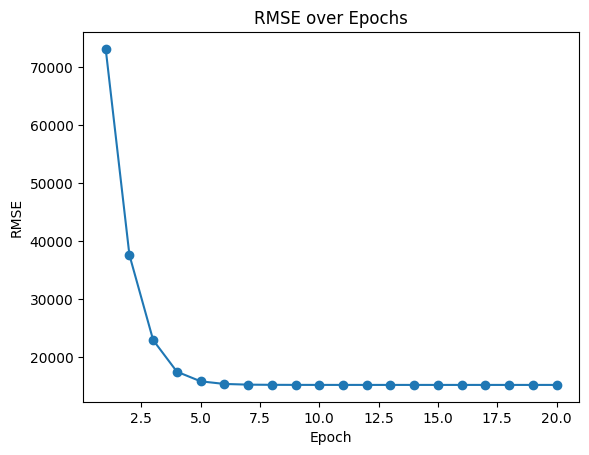

In [49]:
# Plot RMSE over epochs
plt.plot(range(1, epochs + 1), rmses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE over Epochs")
plt.show()

Plotting ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and displaying R2.

##### Calculate R^2 score manually

R^2: 0.6731231610885715


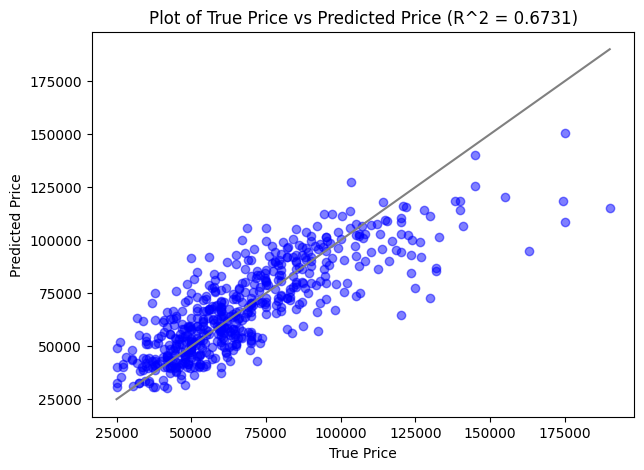

In [50]:
ss_total = np.sum((Y - np.mean(Y)) ** 2)
ss_residual = np.sum((Y - predictions) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R^2: {r_squared}")

plt.figure(figsize=(7, 5))
plt.scatter(Y, predictions, color='blue', alpha=0.5)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title(f"Plot of True Price vs Predicted Price (R^2 = {r_squared:.4f})")

#Add line of perfect fit
plt.plot([min(y), max(y)], [min(y), max(y)], color='gray') 
plt.show()


## 2. Binary classification with logistic regression 

Please download heart_disease_train.csv and heart_disease_test.csv. The dataset is for cardiovascular study. The
target variable is ‘TenYearCHD’, which shows whether the patient has 10-year risk of future coronary heart disease
(CHD). You can find a description of the variables in cardiovascular.txt.

• Gender: male(1) or female(0)\
• Age: Age of the patient\
• Current Smoker: whether or not the patient is a current smoker \
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day\
• BP Meds: whether or not the patient was on blood pressure medication \
• Prevalent Stroke: whether or not the patient had previously had a stroke \
• Prevalent Hyp: whether or not the patient was hypertensive \
• Diabetes: whether or not the patient had diabetes \
• Tot Chol: total cholesterol level \
• Sys BP: systolic blood pressure\
• Dia BP: diastolic blood pressure \
• BMI: Body Mass Index \
• Heart Rate: heart rate \
• Glucose: glucose level \
• TenYearCHD: 10 year risk of coronary heart disease (1 means Yes, 0 means No)

In [51]:
heart_train = pd.read_csv('heart_disease_train.csv')

In [52]:
heart_test = pd.read_csv('heart_disease_test.csv')

In [53]:
heart_train.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [54]:
heart_test.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1


In [55]:
heart_train.dtypes

gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [56]:
heart_test.dtypes

gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

Checking missing values on both heart_train and heart_test

In [57]:
heart_train.isna().sum()

gender               0
age                  0
education           84
currentSmoker        0
cigsPerDay          25
BPMeds              42
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             44
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            315
TenYearCHD           0
dtype: int64

In [58]:
heart_test.isna().sum()

gender              0
age                 0
education          21
currentSmoker       0
cigsPerDay          4
BPMeds             11
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             6
sysBP               0
diaBP               0
BMI                 3
heartRate           0
glucose            73
TenYearCHD          0
dtype: int64

Checking the shape

In [59]:
heart_train.shape

(3390, 16)

In [60]:
heart_test.shape

(848, 16)

In [61]:
heart_train['education'].unique()

array([ 1.,  3.,  2.,  4., nan])

In [62]:
heart_test['education'].unique()

array([ 1.,  2.,  3., nan,  4.])

In [63]:
heart_train['cigsPerDay'].unique()

array([ 0.,  2., 30.,  3., 20., 15., 35., 23., 10.,  1., nan, 11., 40.,
        5.,  9., 17., 16., 43., 12., 25.,  7.,  6.,  4., 50.,  8., 60.,
       18., 70., 13., 38., 14., 45., 19.])

In [64]:
heart_test['cigsPerDay'].unique()

array([ 0., 23.,  1., 20., 30.,  7., 10.,  3.,  5.,  9., 43., 40., 15.,
        6., 35., 25., 13.,  2., 60., 18., nan, 11., 29., 12., 45.,  8.,
       17.])

In [65]:
heart_train['BPMeds'].unique()

array([ 0.,  1., nan])

In [66]:
heart_test['BPMeds'].unique()

array([ 0.,  1., nan])

Checking the statistics of both the train and test set

In [67]:
heart_train.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3306.000000,3390.000000,3365.000000,3348.000000,3390.000000,3390.000000,3390.000000,3346.000000,3390.000000,3390.000000,3374.000000,3389.000000,3075.000000,3390.000000
mean,0.433628,49.614159,1.981246,0.486726,8.962556,0.028375,0.004720,0.302065,0.024779,236.759713,132.126696,82.752065,25.793874,75.776335,82.023089,0.152212
std,0.495648,8.609617,1.023009,0.499897,12.030447,0.166067,0.068548,0.459221,0.155473,45.347259,22.047822,11.933836,4.045690,11.952094,23.934546,0.359280
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.500000,74.500000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.500000,128.000000,82.000000,25.425000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [68]:
heart_test.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,848.000000,848.000000,827.000000,848.000000,844.000000,837.000000,848.000000,848.000000,848.000000,842.000000,848.000000,848.000000,845.000000,848.000000,775.000000,848.000000
mean,0.411557,49.468160,1.969770,0.523585,9.164692,0.034648,0.010613,0.344340,0.029481,236.570071,133.254717,83.458726,25.834485,76.288915,81.743226,0.150943
std,0.492406,8.424758,1.007385,0.499738,11.475080,0.182995,0.102533,0.475433,0.169251,41.471282,21.989009,11.808590,4.217051,12.318492,24.074923,0.358205
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000,92.000000,48.000000,16.750000,45.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.875000,75.500000,23.060000,67.750000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,235.000000,129.000000,82.500000,25.310000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.750000,144.500000,90.000000,27.930000,85.000000,86.000000,0.000000
max,1.000000,69.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,453.000000,215.000000,140.000000,51.280000,125.000000,325.000000,1.000000


### Imputing Missing Values in heart_train and heart_test

Data Imputation: Using subclass methods to handle the missing values. 
For numerical features, we could use mean or median imputation, while for categorical features, mode imputation is suitable.

In order to fill the missing values with sub class, we need to find what features are related with each other the most. For that, we have used the correlation matrix to identify features most strongly correlated with the column containing missing values.

In [69]:
heart_train.corr()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.021699,0.017740,0.197109,0.312110,-0.063121,0.000538,-0.003935,0.021348,-0.075607,-0.041278,0.057516,0.090680,-0.117163,0.017359,0.093203
age,-0.021699,1.000000,-0.156948,-0.218453,-0.186060,0.126578,0.068083,0.304355,0.110090,0.262306,0.386243,0.204637,0.142417,-0.018992,0.121737,0.215881
education,0.017740,-0.156948,1.000000,0.011334,0.003289,-0.002784,-0.032811,-0.062608,-0.044612,-0.009843,-0.113493,-0.043689,-0.122646,-0.048114,-0.033716,-0.036786
currentSmoker,0.197109,-0.218453,0.011334,1.000000,0.771015,-0.047996,-0.032615,-0.096925,-0.048919,-0.051385,-0.130769,-0.103222,-0.164121,0.057198,-0.057929,0.022754
cigsPerDay,0.312110,-0.186060,0.003289,0.771015,1.000000,-0.043402,-0.029953,-0.063781,-0.046534,-0.021426,-0.090941,-0.055125,-0.091066,0.078196,-0.067160,0.054683
BPMeds,-0.063121,0.126578,-0.002784,-0.047996,-0.043402,1.000000,0.069341,0.260374,0.066023,0.098285,0.253094,0.197538,0.090651,0.013199,0.062359,0.103217
prevalentStroke,0.000538,0.068083,-0.032811,-0.032615,-0.029953,0.069341,1.000000,0.085928,0.016710,0.008202,0.047633,0.041469,0.031158,-0.022485,0.015608,0.078652
prevalentHyp,-0.003935,0.304355,-0.062608,-0.096925,-0.063781,0.260374,0.085928,1.000000,0.072848,0.169543,0.696449,0.619885,0.292622,0.147365,0.076927,0.168354
diabetes,0.021348,0.110090,-0.044612,-0.048919,-0.046534,0.066023,0.016710,0.072848,1.000000,0.053439,0.115293,0.035596,0.077206,0.034112,0.603499,0.085651
totChol,-0.075607,0.262306,-0.009843,-0.051385,-0.021426,0.098285,0.008202,0.169543,0.053439,1.000000,0.215922,0.166074,0.117041,0.076157,0.053876,0.087134


Using the sysBP and diaBP, for that categorizing systolic and diastolic BP into ranges.\
For SysBP : Values < 120 are low, 120-140 are normal and >120 high\
For DiaBP : Values < 80 are low, 80-90 are normal and >90 high

In [70]:
def categorize_bp(df, sys_threshold=140, dia_threshold=90):
    """Categorize systolic and diastolic BP into ranges."""
    sys_category = pd.cut(df['sysBP'], bins=[-float('inf'), 120, sys_threshold, float('inf')],
                          labels=['low', 'normal', 'high'], right=True)
    dia_category = pd.cut(df['diaBP'], bins=[-float('inf'), 80, dia_threshold, float('inf')],
                          labels=['low', 'normal', 'high'], right=True)
    return sys_category, dia_category

#### For heart_test, we will ensure that imputation is based on statistics derived from heart_train in order to avoid data leakage.

##### Imputation Logic for Education, cigsPerDay, and Glucose. 

In [71]:
def MissingValueImputer_1(train_df, test_df):
    # Education: filling with mode (categorical variable)
    train_df['education'].fillna(train_df['education'].mode()[0], inplace=True)
    test_df['education'].fillna(train_df['education'].mode()[0], inplace=True)

    # Smoker: filling with the median of current smokers (positively skewed, so using median)
    # Set to 0 for non-smokers as they don't smoke
    train_df.loc[train_df['currentSmoker'] == 0, 'cigsPerDay'] = 0
    test_df.loc[test_df['currentSmoker'] == 0, 'cigsPerDay'] = 0
    
    median_cigs = train_df[train_df['currentSmoker'] == 1]['cigsPerDay'].median()
    
    train_df.loc[train_df['currentSmoker'] == 1, 'cigsPerDay'] = train_df.loc[train_df['currentSmoker'] == 1, 'cigsPerDay'].fillna(median_cigs)
    test_df.loc[test_df['currentSmoker'] == 1, 'cigsPerDay'] = test_df.loc[test_df['currentSmoker'] == 1, 'cigsPerDay'].fillna(median_cigs)

    # Glucose: based on diabetes status (max is significantly higher than 75th percentile, using median)
    # Highest corelation with diabetes columns
    train_df['glucose'] = train_df.groupby('diabetes', observed=False)['glucose'].transform(lambda x: x.fillna(x.median()))
    test_df['glucose'] = test_df.groupby('diabetes', observed=False)['glucose'].transform(
        lambda x: x.fillna(train_df.groupby('diabetes', observed=False)['glucose'].median()[x.name]))
    
    return train_df, test_df

##### Imputation Logic for BPMeds. Having strong corelation with prevalentHyp,sysBP,diaBP

In [72]:
def MissingValueImputer_2(train_df, test_df):
    # BP Meds: 
    # Rule 1: Patients with prevalent hypertension (prevalentHyp == 1)
    train_df.loc[train_df['BPMeds'].isnull() & (train_df['prevalentHyp'] == 1), 'BPMeds'] = 1
    test_df.loc[test_df['BPMeds'].isnull() & (test_df['prevalentHyp'] == 1), 'BPMeds'] = 1
    
    # Rule 2: Patients with very high systolic blood pressure (sysBP > 140) and no prevalent hypertension
    high_bp_threshold = 140
    train_df.loc[train_df['BPMeds'].isnull() & (train_df['sysBP'] > high_bp_threshold), 'BPMeds'] = 1
    test_df.loc[test_df['BPMeds'].isnull() & (test_df['sysBP'] > high_bp_threshold), 'BPMeds'] = 1

    # Rule 3: Patients with very high diaBP blood pressure (diaBP > 90) and no prevalent hypertension
    train_df.loc[train_df['BPMeds'].isnull() & (train_df['diaBP'] > 90), 'BPMeds'] = 1
    test_df.loc[test_df['BPMeds'].isnull() & (test_df['diaBP'] > 90), 'BPMeds'] = 1

    # Rule 4: Remaining missing values default to 0 (not on medication)
    train_df['BPMeds'].fillna(0, inplace=True)
    test_df['BPMeds'].fillna(0, inplace=True)
    train_df['BPMeds'] = train_df['BPMeds'].astype(int)
    test_df['BPMeds'] = test_df['BPMeds'].astype(int)
    
    return train_df, test_df

##### Imputation Logic for Cholestrol, BMI, and Heart Rate.

Using subclass(based on corelation matrix which are highly corelated) and considering median for it. After reading the statistics we got in describe method, we saw feature cholestrol is positively skewed, therefore using median as it is robust to outliers.

For Heart rate also, using median based on the statistics, as max is significantly higher than 75th percentile. Using Median as it is robust to outliers. Same for BMI as well, mean is higher than median and max is higher than 7th percentile. 

In [73]:
def MissingValueImputer_3(train_df, test_df):
    
    # Categorize sysBP for train and test datasets
    train_df['sysBP_category'], train_df['diaBP_category'] = categorize_bp(train_df)
    test_df['sysBP_category'], test_df['diaBP_category'] = categorize_bp(test_df)

    # Cholesterol: Filling based on age and sysBP_category (Highest corelation with these columns)
    train_df['totChol'] = train_df.groupby(['age', 'sysBP_category'], observed=False)['totChol'].transform(
        lambda x: x.fillna(x.median())
    )
    test_df['totChol'] = test_df.groupby(['age', 'sysBP_category'], observed=False)['totChol'].transform(
        lambda x: x.fillna(train_df.groupby(['age', 'sysBP_category'], observed=False)['totChol'].median()[x.name])
    )
    
    # BMI: filling by using age, gender, prevalentHyp, sysBP, and diaBP (Highest corelation with these columns)
    train_df['BMI'] = train_df.groupby(['age', 'gender', 'prevalentHyp', 'sysBP_category', 'diaBP_category'], observed=False)['BMI'].transform(
        lambda x: x.fillna(x.median() if not x.isnull().all() else train_df['BMI'].median()))
    test_df['BMI'] = test_df.groupby(['age', 'gender', 'prevalentHyp', 'sysBP_category', 'diaBP_category'], observed=False)['BMI'].transform(
        lambda x: x.fillna(train_df.groupby(['age', 'gender', 'prevalentHyp', 'sysBP_category', 'diaBP_category'], observed=False)['BMI'].median().get(x.name, train_df['BMI'].median()) if not x.isnull().all() else train_df['BMI'].median()))

    # Heart Rate: filling by using sysBP and diaBP (Highest corelation with these columns)
    train_df['heartRate'] = train_df.groupby(['sysBP_category', 'diaBP_category'], observed=False)['heartRate'].transform(lambda x: x.fillna(x.median()))
    test_df['heartRate'] = test_df.groupby(['sysBP_category', 'diaBP_category'], observed=False)['heartRate'].transform(
        lambda x: x.fillna(train_df.groupby(['sysBP_category', 'diaBP_category'], observed=False)['heartRate'].median()[x.name]))

    # Dropping the temporary sysBP_category column
    train_df.drop(columns=['sysBP_category', 'diaBP_category'], inplace=True)
    test_df.drop(columns=['sysBP_category','diaBP_category'], inplace=True)

    return train_df, test_df

In [74]:
# Imputation Logic for Education, cigsPerDay, and Glucose
MissingValueImputer_1(heart_train, heart_test)
# Imputation Logic for BPMeds¶
MissingValueImputer_2(heart_train, heart_test)
# Imputation Logic for Cholestrol, BMI, and Heart Rate
MissingValueImputer_3(heart_train, heart_test)

print("Train Data Missing Values After Imputation:\n", heart_train.isnull().sum())
print("\nTest Data Missing Values After Imputation:\n", heart_test.isnull().sum())

/var/folders/f9/tzl1jwjn3f3fvhyb_dm77j6h0000gn/T/ipykernel_85751/3040251283.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['education'].fillna(train_df['education'].mode()[0], inplace=True)
/var/folders/f9/tzl1jwjn3f3fvhyb_dm77j6h0000gn/T/ipykernel_85751/3040251283.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

Train Data Missing Values After Imputation:
 gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Test Data Missing Values After Imputation:
 gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### Normalising the data

Applying z-score normalization on heart_train, and then normalizing heart_test using the mean and standard deviation from heart_train.

In [75]:
mean_std = {}

In [76]:
def z_score_normalize(train_df):
    for column in train_df.columns:
        if train_df[column].dtype in ['int64', 'float64'] and column != 'TenYearCHD':
            mean = train_df[column].mean()
            std = train_df[column].std()
            mean_std[column] = (mean, std)
            train_df[column] = (train_df[column] - mean) / std

In [77]:
z_score_normalize(heart_train)

In [78]:
print(mean_std)

{'gender': (0.4336283185840708, 0.495648331104533), 'age': (49.614159292035396, 8.609616730841537), 'education': (1.9569321533923303, 1.0217048588742135), 'currentSmoker': (0.48672566371681414, 0.4998974975685707), 'cigsPerDay': (9.043952802359883, 12.023146397122822), 'BPMeds': (0.033628318584070796, 0.18029709890002746), 'prevalentStroke': (0.00471976401179941, 0.06854833286068387), 'prevalentHyp': (0.30206489675516224, 0.4592209735457691), 'diabetes': (0.024778761061946902, 0.15547316301364433), 'totChol': (236.71312684365782, 45.08705642840767), 'sysBP': (132.12669616519173, 22.047822389406125), 'diaBP': (82.75206489675516, 11.933836490922324), 'BMI': (25.78600442477876, 4.039053065029307), 'heartRate': (75.77610619469027, 11.95033818141861), 'glucose': (81.70766961651917, 22.89993435334305)}


In [79]:
def apply_normalization(heart_test):
    for column, (mean, std) in mean_std.items():
        heart_test[column] = (heart_test[column] - mean) / std

In [80]:
apply_normalization(heart_test)

In [81]:
heart_train.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.142689,1.554755,-0.936603,-0.973651,-0.752212,-0.186516,-0.068853,1.519824,-0.159376,-1.036065,0.719949,0.607343,0.332750,-0.315983,0.187439,0
1,1.142689,-0.535931,1.020909,-0.973651,-0.752212,-0.186516,-0.068853,-0.657777,-0.159376,-1.657086,-0.323238,0.523548,0.543196,0.771852,0.056434,0
2,-0.874871,0.160964,-0.936603,1.026759,-0.585866,-0.186516,-0.068853,-0.657777,-0.159376,0.538666,-0.232526,-0.146815,-1.373095,-0.064944,0.624121,0
3,1.142689,-0.535931,1.020909,1.026759,1.742975,-0.186516,-0.068853,-0.657777,-0.159376,0.294694,-0.277882,0.565446,0.716503,-0.064944,0.449448,0
4,-0.874871,-0.535931,0.042153,1.026759,-0.502693,-0.186516,-0.068853,-0.657777,-0.159376,0.294694,-0.096458,-0.230610,-1.373095,1.190250,0.187439,0


In [82]:
heart_test.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,-0.874871,0.741710,-0.936603,-0.973651,-0.752212,-0.186516,-0.068853,1.519824,6.272602,0.804818,0.175677,-0.230610,0.481300,1.190250,5.602301,1
1,-0.874871,-0.419782,0.042153,-0.973651,-0.752212,-0.186516,-0.068853,-0.657777,-0.159376,0.294694,-0.504662,-0.146815,0.728883,1.608649,-0.249244,0
2,-0.874871,0.277113,-0.936603,-0.973651,-0.752212,-0.186516,-0.068853,-0.657777,-0.159376,0.849177,-0.912865,-0.984768,-0.026245,0.353454,-0.161907,0
3,-0.874871,-0.419782,1.020909,1.026759,1.160765,-0.186516,-0.068853,-0.657777,-0.159376,1.070970,-0.096458,0.104571,-0.665008,0.771852,0.143770,0
4,1.142689,2.251650,-0.936603,1.026759,-0.669039,-0.186516,-0.068853,-0.657777,-0.159376,0.183797,-0.413950,-0.481996,0.196580,-0.483342,-0.030903,1


Our both datasets are free from missing values and are in normalised form now. We can begin to build logistic regression model.

In [83]:
# Preparing data for training and testing by separate features and target variable
X_train = heart_train.drop(columns=['TenYearCHD']).values
y_train = heart_train['TenYearCHD'].values

X_test = heart_test.drop(columns=['TenYearCHD']).values
y_test = heart_test['TenYearCHD'].values

In [84]:
# Adding bias term to X
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [85]:
# Initialize weights and setting other parameters
# initializing with the same logic as in ques 1
weights = np.random.randn(X_train.shape[1]) * 0.01

m, n = X_train.shape
learning_rate = 0.1
epochs = 10

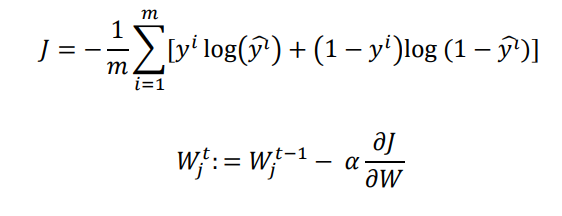

Sigmoid function

In [86]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Cost function (Binary Cross-Entropy)

In [87]:
def compute_cost(y, y_pred):
    m = len(y)
    cost = -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

Gradient Descent Algorithm based on Logistic Regression

From class slides:

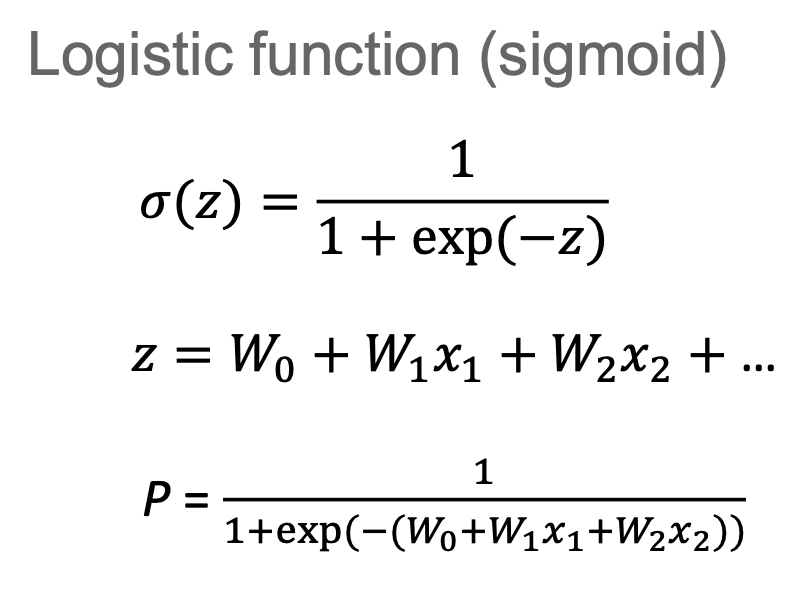

In [88]:
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = X.shape[0]
    for epoch in range(epochs):
        # z as per formula
        z = np.dot(X, weights)
        y_pred = sigmoid(z)
        
        # Compute cost
        cost = compute_cost(y, y_pred)
        print(f"Epoch {epoch+1}, Cost: {cost}")
        
        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        
        # Update weights
        weights -= learning_rate * dw
    
    return weights

Prediction

In [89]:
def predict(X, weights):
    z = np.dot(X, weights)
    y_pred = sigmoid(z)
    return [1 if i >= 0.5 else 0 for i in y_pred]

Please print out the Cost function J for every iteration (until 10 epochs) for the train dataset.

Train the model

In [90]:
optimal_weights = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

Epoch 1, Cost: 0.6939275939216488
Epoch 2, Cost: 0.6792177301857384
Epoch 3, Cost: 0.66546804063382
Epoch 4, Cost: 0.6525948555863147
Epoch 5, Cost: 0.640523025413177
Epoch 6, Cost: 0.6291851594335296
Epoch 7, Cost: 0.618520860227914
Epoch 8, Cost: 0.6084759855469655
Epoch 9, Cost: 0.5990019574596301
Epoch 10, Cost: 0.5900551291807082


Make predictions on train and test sets

In [91]:
train_predictions = predict(X_train, optimal_weights)
test_predictions = predict(X_test, optimal_weights)

##### Evaluation

Please print out confusion matrix and its corresponding accuracy, precision, and recall for the train and test dataset after the last iteration. 

##### Confusion Matrix

In [92]:
def evaluate(y_true, y_pred):
    tp = sum((y_true == 1) & (np.array(y_pred) == 1))
    tn = sum((y_true == 0) & (np.array(y_pred) == 0))
    fp = sum((y_true == 0) & (np.array(y_pred) == 1))
    fn = sum((y_true == 1) & (np.array(y_pred) == 0))

    print("\nConfusion Matrix:")
    print("----------------")
    print(f"            Predicted")
    print(f"             1    0")
    print(f"Actual  1  [TP:{tp:3d} FN:{fn:3d}]")
    print(f"        0  [FP:{fp:3d} TN:{tn:3d}]")
    
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    print("\nMetrics:")
    print(f"Accuracy:  {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")

In [93]:
# Evaluate on train dataset
print("\nTrain Dataset Evaluation:")
evaluate(y_train, train_predictions)


Train Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP: 79 FN:437]
        0  [FP:100 TN:2774]

Metrics:
Accuracy:  0.842
Precision: 0.441
Recall:    0.153


In [94]:
# Evaluate on test dataset
print("\nTest Dataset Evaluation:")
evaluate(y_test, test_predictions)


Test Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP: 23 FN:105]
        0  [FP: 25 TN:695]

Metrics:
Accuracy:  0.847
Precision: 0.479
Recall:    0.180


The model shows an accuracy of approximately 83-84% on both the train and test datasets. However, this seems to be misleading, if we notice the precision and recall metrics for both train and test datasets. On the train set, the precision is 0.441 and recall is 0.153, while on the test set, precision improves slightly to 0.479 and recall increases to 0.180. This tells that the model is more effective at reducing false positives (higher precision) but struggles with capturing a good portion of the actual positive cases (relatively low recall).

This low recall tells also tells us that dataset is imbalanced. In such cases, model predicts well on majority class(here '0') and struggles to classify minority class(here '1'). The model is maintaining high overall accuracy due to correct prediction of the majority class. The low recall tells us that model is missing many of the positive cases. 

Original Requirement for the assignment is finished at this point. Trying additional things to improve the results.

### =============================================

## Trying to Address imbalance by using weighted cost function

Applying higher weights to the minority class and lower to majority class to allow balance for the dataset. Updated the cost function to use the calculated weights.

In [95]:
def compute_cost_w(y, y_pred, w1, w0):
    m = len(y)
    cost = - (1 / m) * np.sum(
        w1 * y * np.log(y_pred + 1e-15) + 
        w0 * (1 - y) * np.log(1 - y_pred + 1e-15)
    )
    return cost

In [96]:
def gradient_descent_w(X, y, weights, learning_rate, epochs):
    m = len(y)
    
    pos_count = np.sum(y)
    neg_count = m - pos_count
    w1 = m / (2 * pos_count)
    w0 = m / (2 * neg_count)
    
    for epoch in range(epochs):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)
        
        cost = compute_cost_w(y, y_pred, w1, w0)
        print(f"Epoch {epoch+1}, Cost: {cost}")
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        
        weights -= learning_rate * dw
    
    return weights

In [97]:
def predict_w(X, weights):
    z = np.dot(X, weights)
    y_pred = sigmoid(z)
    return [1 if i >= 0.5 else 0 for i in y_pred]

In [98]:
weights = np.random.randn(X_train.shape[1]) * 0.01

m, n = X_train.shape
learning_rate = 0.1
epochs = 10

optimal_weights_w = gradient_descent_w(X_train, y_train, weights, learning_rate, epochs)

Epoch 1, Cost: 0.6924977446891223
Epoch 2, Cost: 0.6878514814752195
Epoch 3, Cost: 0.6838852667699582
Epoch 4, Cost: 0.6805289367686805
Epoch 5, Cost: 0.6777198992467847
Epoch 6, Cost: 0.6754023698599398
Epoch 7, Cost: 0.6735266395452729
Epoch 8, Cost: 0.6720483916123675
Epoch 9, Cost: 0.670928078135847
Epoch 10, Cost: 0.6701303589975697


In [99]:
train_predictions_w = predict_w(X_train, optimal_weights_w)
test_predictions_w = predict_w(X_test, optimal_weights_w)

In [100]:
print("\nTrain Dataset Evaluation:")
evaluate(y_train, train_predictions_w)


Train Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP:107 FN:409]
        0  [FP:143 TN:2731]

Metrics:
Accuracy:  0.837
Precision: 0.428
Recall:    0.207


In [101]:
print("\nTest Dataset Evaluation:")
evaluate(y_test, test_predictions_w)


Test Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP: 27 FN:101]
        0  [FP: 38 TN:682]

Metrics:
Accuracy:  0.836
Precision: 0.415
Recall:    0.211


Looking at the results, we don't see any improvement over the original model which did not consider weights. Trying an alternate approach. 

## Trying to address imbalance using SMOTE method

Creating synthetic data for the minority class to balance the training dataset.

In [102]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

In [103]:
weights = np.zeros(X_balanced.shape[1])
learning_rate = 0.01
epochs = 10

trained_weights = gradient_descent(X_balanced, y_balanced, weights, learning_rate, epochs)

Epoch 1, Cost: 0.6931471805599453
Epoch 2, Cost: 0.6921968127898235
Epoch 3, Cost: 0.6912618768164219
Epoch 4, Cost: 0.6903420909159323
Epoch 5, Cost: 0.6894371777202472
Epoch 6, Cost: 0.6885468642193586
Epoch 7, Cost: 0.6876708817590796
Epoch 8, Cost: 0.6868089660343142
Epoch 9, Cost: 0.6859608570781046
Epoch 10, Cost: 0.6851262992466836


In [104]:
def predict_sm(X, weights, threshold=0.5):
    z = np.dot(X, weights)
    y_pred = sigmoid(z)
    return (y_pred >= threshold).astype(int)

In [105]:
train_predictions_sm = predict_sm(X_balanced, trained_weights)
test_predictions_sm = predict_sm(X_test, trained_weights)

In [106]:
print("\nTrain Dataset Evaluation:")
evaluate(y_balanced, train_predictions_sm)


Train Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP:1945 FN:929]
        0  [FP:1103 TN:1771]

Metrics:
Accuracy:  0.646
Precision: 0.638
Recall:    0.677


In [107]:
print("\nTest Dataset Evaluation:")
evaluate(y_test, test_predictions_sm)


Test Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP: 96 FN: 32]
        0  [FP:291 TN:429]

Metrics:
Accuracy:  0.619
Precision: 0.248
Recall:    0.750


Results seem promising on the Train dataset with high precision and recall. However, low precision on test dataset means the model is overfitting. Further exploration use regularization techniques can be evaluated. 

## Thank you!